In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('refined_drug_data.csv', sep=';')
# all NaN to empty string
df = df.fillna('')

data = df.copy()
# make an array
data['drug_names'] = data[['Drug_1', 'Drug_2', 'Drug_3', 'Drug_4', 'Drug_5', 'Drug_6', 'Drug_7', 'Drug_8']].values.tolist()
# remove empty strings
data['drug_names'] = data['drug_names'].apply(lambda x: [i for i in x if i])
data = data.drop(['Drug_1', 'Drug_2', 'Drug_3', 'Drug_4', 'Drug_5', 'Drug_6', 'Drug_7', 'Drug_8'], axis=1)
data

print('Total number of combinations:', len(data))
print('Number of unique drugs:', len(data['drug_names'].explode().unique()))

# sort by freq 
sorted_drug = data['drug_names'].explode().value_counts().index
print('Sorted medications by frequency:', sorted_drug)
print('Frequency of each medication:', data['drug_names'].explode().value_counts().to_list())

Total number of combinations: 912
Number of unique drugs: 40
Sorted medications by frequency: Index(['LISINOPRIL', 'SIMVASTATIN', 'METOPROLOL', 'METFORMIN', 'LEVOTHYROXINE',
       'AMLODIPINE', 'HYDROCHLOROTHIAZIDE', 'FUROSEMIDE', 'ATORVASTATIN',
       'OMEPRAZOLE', 'ATENOLOL', 'GLIPIZIDE', 'ALBUTEROL', 'WARFARIN',
       'ASPIRIN', 'POTASSIUM CHLORIDE', 'ESOMEPRAZOLE', 'CLOPIDOGREL',
       'CARVEDILOL', 'VALSARTAN', 'LOSARTAN', 'GABAPENTIN', 'ROSUVASTATIN',
       'LOVASTATIN', 'PIOGLITAZONE', 'PRAVASTATIN', 'RANITIDINE', 'TRAMADOL',
       'IBUPROFEN', 'INSULIN GLARGINE', 'CITALOPRAM', 'ALENDRONATE',
       'ALLOPURINOL', 'MONTELUKAST', 'FEXOFENADINE', 'TAMSULOSIN', 'ZOLPIDEM',
       'SERTRALINE', 'FLUTICASONE NASAL', 'PREDNISONE'],
      dtype='object')
Frequency of each medication: [294, 270, 223, 215, 170, 159, 157, 133, 133, 127, 123, 98, 82, 81, 75, 72, 65, 65, 63, 62, 55, 54, 54, 52, 50, 48, 48, 46, 43, 42, 42, 42, 39, 34, 33, 32, 32, 32, 29, 28]


In [8]:
# print freq of LISINOPRIL
print('Frequency of LISINOPRIL:', data['drug_names'].explode().value_counts()['LISINOPRIL'])

Frequency of LISINOPRIL: 294


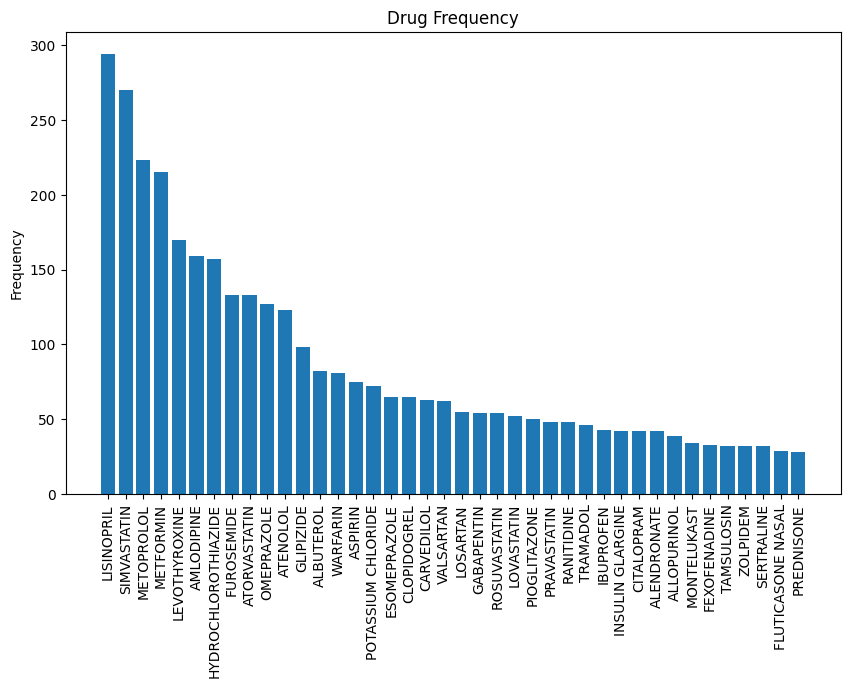

In [9]:
# plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_drug, data['drug_names'].explode().value_counts().values)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Drug Frequency')
plt.show()

# SUGGESTION: with each 100 freq, set a new machine for that drug.
# OTAZKA: prirazovat stroje podle jakeho principu? nahodne - neni dobry napad nejspis.

## Evolutional algo
#### pymoo

In [1]:
def get_layout(type): 
    if type == 'rectangle':
        COORDINATE_X = 4
        COORDINATE_Y = 20
        restricted_area = np.zeros((COORDINATE_X, COORDINATE_Y))
        restricted_area[1:COORDINATE_X-1, 1:COORDINATE_Y-1] = 1
        restricted_area[[0, 0, -1, -1], [0, -1, -1, 0]] = 1
    elif type == 'square':
        COORDINATE_X = 12
        COORDINATE_Y = 12
        restricted_area = np.zeros((COORDINATE_X, COORDINATE_Y))
        restricted_area[1:COORDINATE_X-1, 1:COORDINATE_Y-1] = 1
        restricted_area[[0, 0, -1, -1], [0, -1, -1, 0]] = 1
    elif type == 'kolecko':
        COORDINATE_X = 9
        COORDINATE_Y = 8
        restricted_area = np.zeros((COORDINATE_X, COORDINATE_Y))
        restricted_area[1:COORDINATE_X-1, 1:COORDINATE_Y-1] = 1
        restricted_area[[0, 0, -1, -1], [0, -1, -1, 0]] = 1
        restricted_area[2:COORDINATE_X-2, 2:COORDINATE_Y-2] = 0
        restricted_area[3:COORDINATE_X-3, 3:COORDINATE_Y-3] = 1
    return COORDINATE_X, COORDINATE_Y, restricted_area


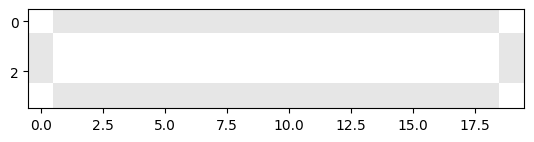

All possible positions: 40


In [6]:
COORDINATE_X, COORDINATE_Y, restricted_area = get_layout('rectangle')

plt.figure()
plt.imshow(restricted_area, cmap='gray', alpha=0.1)
plt.show()

all_posible_positions = [(i, j) for i in range(COORDINATE_X) for j in range(COORDINATE_Y) if restricted_area[i, j] == 0]

print('All possible positions:', all_posible_positions.__len__())

In [178]:
# TRY as initial


init_value = [38, 37, 22, 33, 36, 6, 9, 29, 18, 25, 28, 32, 27, 3, 0, 34, 4, 19, 8, 35, 24, 15, 7, 10, 5, 17, 26, 16, 1, 39, 2, 13, 30, 11, 31, 12, 20, 14, 21, 23]
init_population = np.array(2 * [init_value])

In [179]:
# Prepare problem
perm = range(40)
drug_names = data['drug_names'].explode().value_counts().index

positions = all_posible_positions

num_of_positions = len(positions)
distances = np.zeros((num_of_positions, num_of_positions))
for i in range(num_of_positions):
    for j in range(num_of_positions):
        distances[i, j] = np.sqrt((positions[i][0] - positions[j][0])**2 + (positions[i][1] - positions[j][1])**2)

# create array of recepies where each drug is index in drug_names
recepts = []
for i in range(len(data)):
    recepts.append([drug_names.to_list().index(drug) for drug in data['drug_names'][i]])

In [180]:
# make the same size recepts (place 0)
max_len = max([len(recept) for recept in recepts])
for i in range(len(recepts)):
    recepts[i] = recepts[i] + [0] * (max_len - len(recepts[i]))


# np.array(recepts)
np_recepts = np.array(recepts)

In [53]:
# np_recepts

array([[18, 16,  4, ...,  0,  0,  0],
       [ 5,  2,  9, ...,  0,  0,  0],
       [31,  8,  4, ...,  0,  0,  0],
       ...,
       [ 5, 11, 28, ...,  9, 25,  0],
       [12, 33, 39, ...,  0,  0,  0],
       [12, 30, 28, ...,  0,  0,  0]])

In [181]:
#define the problem
import itertools
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.sampling.rnd import PermutationRandomSampling
from pymoo.operators.crossover.ox import OrderCrossover
from pymoo.operators.mutation.inversion import InversionMutation
from pymoo.termination.default import DefaultSingleObjectiveTermination
from pymoo.termination import get_termination
from pymoo.optimize import minimize


class MyProblem(ElementwiseProblem):
        def __init__(self, permutation, recepts, positions, distances):
            self.permutation = permutation
            self.recepts = recepts
            self.floor_positions = positions
            self.distances = distances
            # self.co_occurence_matrix = frequence_metrix # with the freq of recept too
            super().__init__(n_var=len(permutation), n_obj=1, n_constr=0, xl=0, xu=1)

        def _evaluate(self, x, out, *args, **kwargs):
            sum_of_all_recepts_distances = 0
            # print('next eval')
            for recept in self.recepts:
                # TODO multiply by frequency of the recept
                # todo do not go through recepts, but through pairs freq (pair distance * freq). NO - it is not possible because we need minimal within the recept
                # freq_of_recept = 1
                cur_position_indexes = np.where(np.isin(x, recept[recept != 0]))[0]
                # print(recept, 'cur_position_indexes2:', cur_position_indexes)

                # Min distance of perm
                all_perms_of_recept = list(itertools.permutations(cur_position_indexes))

                # calculate distance of each combination TODO - optimize
                distances_of_perms = np.zeros(len(all_perms_of_recept))
                for ind, perm in enumerate(all_perms_of_recept):
                    dist = sum([self.distances[perm[i], perm[i+1]] for i in range(len(perm) - 1)])
                    # print(dist)
                    distances_of_perms[ind] = dist
  
                min_dist = np.min(distances_of_perms)
                sum_of_all_recepts_distances += min_dist
            out["F"] = sum_of_all_recepts_distances


In [184]:
population_size = 10
init_population[1] = np.array([38, 15, 13 ,30, 11, 22, 32, 27, 37,  3, 24, 25, 18, 39, 19,  8, 35,  0,  9,  2 ,34 ,29,  4 , 1,
 16, 26, 17 , 5 , 7 , 6 ,10 ,36, 28 ,31, 33, 12, 20, 14 ,23, 21])
problem = MyProblem(perm, np_recepts, positions, distances)
algorithm = GA(
    pop_size=population_size, 
    eliminate_duplicates=True, 
    sampling=init_population, 
    crossover=OrderCrossover(), 
    mutation=InversionMutation(), 
    termination=DefaultSingleObjectiveTermination()
)
# termination = DefaultSingleObjectiveTermination(period=50, n_max_gen=1000)
termination = get_termination("n_eval", 1000)
res = minimize(
    problem,
    algorithm,
    termination,
    # seed=1,
)

In [185]:
print('Cost (through all recepts): ', res.F)
print('Permutation: ', res.X)

# INIT RANDOM
# Cost (through all recepts):  [10443.08212544]
# Permutation:  [26 12 28 33 22  3  7 13 6 31 2 4 14 18 25 19 27 29 36 30 10 37 39 21 20 17 32  8  9  1 16  0 15  5 11 38 34 24 23 35]

# INIT BY FREQENCY
# Cost (through all recepts):  [10054.48044302]
# Permutation:  [38 37 34 33 22  5 17  2  9  0  3 12 24 35  8 28 32 27 36 13 30 11 31 16
#  29 18 25 19  7 39  1  4 15  6 10 26 20 14 21 23]

# KOLECKO (pop_size 2), 200 iterations 
# Cost (through all recepts):  [6870.99786396]
# Permutation:  [38 15 13 30 11 37 27 32 22  3 24 25 18 39 19  8 35  0 34  2  9 29  4  1
#  16 26 17  5  7 10  6 36 33 31 28 12 20 14 23 21]
# 300 iterations
# Cost (through all recepts):  [6811.25370532]
# Permutation:  [38 15 13 30 11 22 32 27 37  3 24 25 18 39 19  8 35  0  9  2 34 29  4  1
#  16 26 17  5  7  6 10 36 28 31 33 12 20 14 23 21]
# 500 iterations
# Cost (through all recepts):  [6439.88661859]
# Permutation:  [38 23 14 20 11 22 32 27 26 17 25  3 24 37 16  1  4 29 34  2  9  0 35  8
#  19 39 18  5  7  6 10 31 28 36 33 12 15 13 21 30]

# OBDELNIK 
# Cost (through all recepts):  [8853.49292527]
# Permutation:  [38 35 37 22 26 16 29 10 15  1  4  8 19  3 24 11 18 25 28 32 27 20 30  0
#  31 39 12 34 33  9  6 13  2  7  5 17 36 14 21 23]

# SQUARE 
# Cost (through all recepts):  [11386.84637969]
# Permutation:  [38 26 25 15  7 10 18  9 13 29 20 14 27 19 16  5 17  1 39  2 36  6 33  3
#  12  8 35 24 28 32  0 37 34 30 22  4 31 11 21 23]

Cost (through all recepts):  [6471.40666747]
Permutation:  [37 24 25 27 18 38 32 22 15  3 11 30 13 39 17  8 19 16 26  1  4 29 34  2
  9  0 35  7  5  6 10 36 33 31 28 12 20 14 23 21]


In [127]:
# init_value compare to res.X

is_same = np.array_equal(init_value, res.X)
print('Is same as initial value:', is_same)
print('Differences: ', np.where(init_value != res.X))
print(init_value, res.X)

Is same as initial value: False
Differences:  (array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35]),)
[38, 37, 22, 33, 36, 6, 9, 29, 18, 25, 28, 32, 27, 3, 0, 34, 4, 19, 8, 35, 24, 15, 7, 10, 5, 17, 26, 16, 1, 39, 2, 13, 30, 11, 31, 12, 20, 14, 21, 23] [38 37 34 33 22  5 17  2  9  0  3 12 24 35  8 28 32 27 36 13 30 11 31 16
 29 18 25 19  7 39  1  4 15  6 10 26 20 14 21 23]
